# Linear Regression Model Training
### Read in features and labels
### Do some multivariate linear regression
### See how good the fits are

In [1]:
# imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import random
from sklearn import linear_model
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
# use scaled features and labels or not
scaled = False

In [3]:
# define extra bit for filenames, in case of only using one NAICS code
extras = ['all','44','45','56','62']
i = 0
extra = '_'+extras[i]

In [4]:
# read in labeled examples (see build_features_labels.ipynb for more info)
labels = np.genfromtxt('data_final/labels_scaled'+extra+'.csv')
# save number of businesses (i.e., examples)
n_examples = len(labels)
print n_examples
print labels[:10]

314
[ 54.2  53.8  54.2  48.6  51.6  44.9  38.8  44.6  36.1  26.4]


In [5]:
# read-in features (see build_features_labels.ipynb for more info)
if scaled:
    features = np.genfromtxt('data_final/features_scaled'+extra+'.csv', delimiter=',')
    means_stddevs = np.genfromtxt('data_final/means_stddevs'+extra+'.csv', delimiter=',')
else:
    features = np.genfromtxt('data_final/features'+extra+'.csv', delimiter=',')
print features.shape
# cut only features we wanna use right now
###features = features[:,np.array([0,1,2,3,4,5])]
###if scaled:
###    means = means_stddevs[0,np.array([0,1,2,3,4,5])]
###    stddevs = means_stddevs[1,np.array([0,1,2,3,4,5])]
# for only Nth feature, use 5 lines below instead of 4 above
###N = 6
###features = features[:, np.newaxis, N]
###if scaled:
###    means = means_stddevs[0, np.newaxis, N]
###    stddevs = means_stddevs[1, np.newaxis, N]
print features.shape
print features[:10]

(314, 22)
(314, 22)
[[  3.02900000e+03   5.01000000e-01   4.99000000e-01   5.03000000e+01
    4.98000000e+01   4.98000000e+01   1.81000000e-01   8.19000000e-01
    1.39700000e+03   5.89000000e+01   2.31000000e+01   1.80000000e+01
    5.46000000e+01   1.06406000e+05   1.15066000e+05   2.78130000e+04
    1.89500000e+03   1.92300000e+03   1.83900000e+03   0.00000000e+00
    1.33000000e+02   1.33000000e+02]
 [  1.80100000e+03   4.69000000e-01   5.31000000e-01   4.65000000e+01
    4.55000000e+01   4.55000000e+01   1.31000000e-01   8.69000000e-01
    1.04700000e+03   3.41000000e+01   1.11000000e+01   5.48000000e+01
    6.92000000e+01   9.79760000e+04   1.57500000e+05   4.28910000e+04
    1.33800000e+03   2.24300000e+03   9.74000000e+02   4.16177300e+06
    1.82000000e+02   1.82000000e+02]
 [  4.20800000e+03   5.06000000e-01   4.94000000e-01   3.96000000e+01
    4.00000000e+01   4.00000000e+01   1.16000000e-01   8.84000000e-01
    2.41300000e+03   3.27000000e+01   9.50000000e+00   5.78000000e

### Split examples into training and testing sets (but probably too few to be meaningful)

In [6]:
# get a random ordering of the indeces
rando_order = random.sample(range(n_examples),n_examples)
#print rando_order

# find the index cutoff for given percentage to be used in the test set
percent_test = 20
index_cutoff = np.int(n_examples*percent_test/100)
print index_cutoff

62


In [7]:
# split the random ordering into training and testing
trainers = rando_order[index_cutoff:]
#print trainers
testers = rando_order[:index_cutoff]
#print testers

# *randomly* split the data into training/testing sets
features_train = features[trainers]#,:]
features_test = features[testers]#,:]
print features.shape
print features_train.shape
print features_test.shape
labels_train = labels[trainers]
labels_test = labels[testers]
print labels.shape
print labels_train.shape
print labels_test.shape
#print labels_train
#print labels_test

(314, 22)
(252, 22)
(62, 22)
(314,)
(252,)
(62,)


### As of this point, the features and labels are read-in and randomly split into training and testing sets (80/20)

In [8]:
# create linear regression object, fitting intercept and normalizing features
regr = linear_model.LinearRegression(normalize=True)

# train the model using the training sets
regr.fit(features_train, labels_train)

# intercept and coefficients of fit
print "Intercept = "+str(regr.intercept_)
print "Coefficients:"
print regr.coef_

Intercept = 6.41483272215e+15
Coefficients:
[  1.53617689e-03  -6.41483272e+15  -6.41483272e+15  -1.46417738e+00
  -3.68768801e+11   3.68768801e+11  -1.53992687e+03  -1.51136900e+03
  -3.46587873e-03   1.54216567e+01   1.55905602e+01   1.53010678e+01
   1.39109944e-01  -4.11964178e-05  -6.77256906e-06   2.84316969e-05
  -4.19891251e-03   5.62261408e-04   6.36983967e-03   3.06123958e-08
  -1.28666679e+10   1.28666679e+10]


## Use scikit-learn

In [9]:
# do some scoring
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.feature_selection import f_regression

# root mean square error
print("RMSE %.3f" % np.sqrt(mean_squared_error(labels_test,regr.predict(features_test))))
# explained variance score: 1 is perfect prediction
print("Explained Variance Score (1 is perfect): %.3f" % \
      explained_variance_score(labels_test,regr.predict(features_test)))
# r-squared value
print("r-squared value: %.3f" % regr.score(features_test, labels_test))
# mean absolute error
print("Mean Absolute Error %.3f" % mean_absolute_error(labels_test,regr.predict(features_test)))
# F regression
f_p = f_regression(features_test, labels_test)
print "F-values of features:"
print f_p[0]
print "p-values of F scores:"
print f_p[1]

RMSE 12.399
Explained Variance Score (1 is perfect): -0.016
r-squared value: -0.017
Mean Absolute Error 8.845
F-values of features:
[  5.69369598e+00   1.93703137e+00   1.93703137e+00   1.47471192e+01
   1.47263644e+01   1.47263644e+01   3.35555391e-01   3.35555391e-01
   1.77574465e-05   4.54168999e+00   4.50762966e+00   5.90393399e+00
   1.32413304e+00   4.99067224e+00   4.28318931e+00   7.39929858e-01
   1.59556991e+00   3.24319042e-01   6.75132183e-01   5.14261928e-01
   5.63423291e+00   5.63423291e+00]
p-values of F scores:
[  2.01979046e-02   1.69129418e-01   1.69129418e-01   2.98695617e-04
   3.01343150e-04   3.01343150e-04   5.64574659e-01   5.64574659e-01
   9.96651737e-01   3.71854001e-02   3.78780963e-02   1.81164671e-02
   2.54417046e-01   2.92228722e-02   4.28051246e-02   3.93107523e-01
   2.11418754e-01   5.71149580e-01   4.14521125e-01   4.76082233e-01
   2.08316944e-02   2.08316944e-02]


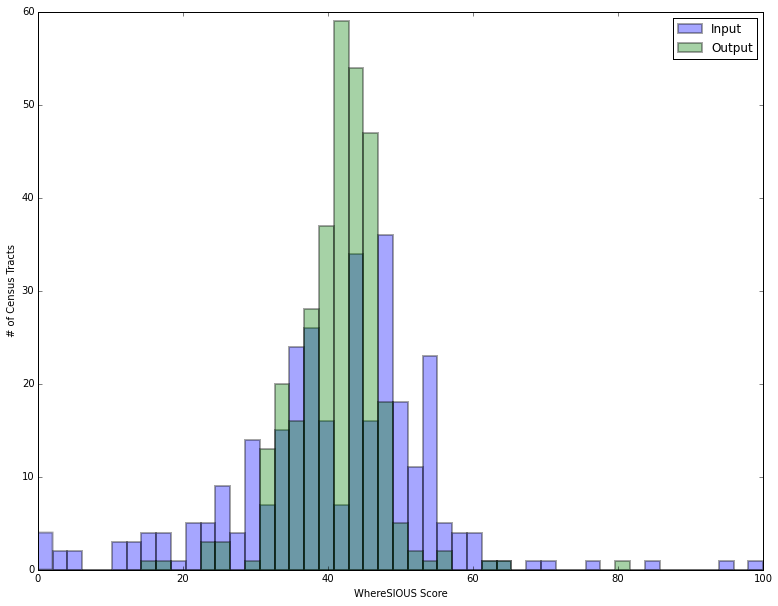

In [10]:
# use coefficients to calculate score for each census tract
scores = regr.predict(features)
# make histogram of scores
plt.figure(figsize=(13, 10))
bin_width = 2
bins = np.linspace(min(labels), max(labels), (max(labels)-min(labels))/bin_width)
plt.hist(labels, bins, linewidth=2, alpha=0.35, label='Input');
plt.hist(scores, bins, linewidth=2, alpha=0.35, label='Output');
plt.xlim([min(labels),max(labels)])
plt.legend(loc=0)
plt.xlabel('WhereSIOUS Score')
plt.ylabel('# of Census Tracts')

## Use statsmodels (w/ all input features)

In [26]:
# turn features and labels into dataframe
#df_new = pd.DataFrame({'Score': labels, 'Population': features[:,0], 'Median_Age': features[:,1], \
#                       'Num_Homes': features[:,2], 'Employment_Percentage': features[:,3], \
#                       'Median_Income': features[:,4], 'Median_Housing_Cost': features[:,5]})
df_new = pd.DataFrame({'Score': labels, 'Population': features[:,0], 'Population_Percent_Male': features[:,1], \
                       'Population_Percent_Female': features[:,2], 'Median_Age': features[:,3], \
                       'Median_Age_Male': features[:,4], 'Median_Age_Female': features[:,5], \
                       'Percent_Minor': features[:,6], 'Percent_Adult': features[:,7], \
                       'Num_Homes': features[:,8], 'Homes_Percent_Mortgage': features[:,9], \
                       'Homes_Percent_Clear': features[:,10], 'Homes_Percent_Rent': features[:,11], \
                       'Employment_Percentage': features[:,12], 'Median_Income': features[:,13], \
                       'Median_Income_Owner': features[:,14], 'Median_Income_Renter': features[:,15], \
                       'Median_Housing_Cost': features[:,16], 'Median_Housing_Cost_Owner': features[:,17], \
                       'Median_Housing_Cost_Renter': features[:,18], 'Parking_Meter_Amount': features[:,19], \
                       'Num_Businesses': features[:,20], 'Num_Businesses_Code': features[:,21]})
print df_new.shape
df_new[:10]

(314, 23)


,Employment_Percentage,Homes_Percent_Clear,Homes_Percent_Mortgage,Homes_Percent_Rent,Median_Age,Median_Age_Female,Median_Age_Male,Median_Housing_Cost,Median_Housing_Cost_Owner,Median_Housing_Cost_Renter,...,Num_Businesses,Num_Businesses_Code,Num_Homes,Parking_Meter_Amount,Percent_Adult,Percent_Minor,Population,Population_Percent_Female,Population_Percent_Male,Score
0,54.6,23.1,58.9,18.0,50.3,49.8,49.8,1895.0,1923.0,1839.0,...,133.0,133.0,1397.0,0.0,0.819,0.181,3029.0,0.499,0.501,54.2
1,69.2,11.1,34.1,54.8,46.5,45.5,45.5,1338.0,2243.0,974.0,...,182.0,182.0,1047.0,4161773.0,0.869,0.131,1801.0,0.531,0.469,53.8
2,75.0,9.5,32.7,57.8,39.6,40.0,40.0,1559.0,2026.0,1445.0,...,184.0,184.0,2413.0,11290108.0,0.884,0.116,4208.0,0.494,0.506,54.2
3,71.2,6.6,21.5,71.9,38.8,40.9,40.9,1394.0,2310.0,1282.0,...,493.0,493.0,3136.0,68427664.0,0.950,0.050,4732.0,0.480,0.520,48.6
4,75.4,3.4,12.2,84.4,35.5,38.2,38.2,1299.0,1870.0,1255.0,...,480.0,480.0,2288.0,44826639.0,0.952,0.048,3669.0,0.450,0.550,51.6
5,79.8,8.1,26.7,65.2,39.8,40.6,40.6,1224.0,1819.0,1145.0,...,202.0,202.0,1726.0,2167540.0,0.922,0.078,2722.0,0.502,0.498,44.9
6,77.5,6.6,23.4,70.1,38.6,40.1,40.1,1216.0,1587.0,1181.0,...,251.0,251.0,1984.0,1183230.0,0.941,0.059,3108.0,0.470,0.530,38.8
7,74.9,5.2,20.1,74.7,38.2,40.0,40.0,1347.0,2417.0,1241.0,...,214.0,214.0,2479.0,11955695.0,0.947,0.053,3754.0,0.465,0.535,44.6
8,72.0,5.5,23.3,71.2,36.3,38.0,38.0,1093.0,1808.0,1011.0,...,134.0,134.0,2663.0,1451274.0,0.890,0.110,4280.0,0.471,0.529,36.1
9,79.4,1.5,13.4,85.1,34.3,35.3,35.3,1056.0,1804.0,995.0,...,235.0,235.0,3141.0,3235196.0,0.889,0.111,5178.0,0.478,0.522,26.4


In [12]:
# fit the data
lm = smf.ols(formula='Score ~ Population + Population_Percent_Male + Population_Percent_Female + Median_Age + Median_Age_Male + Median_Age_Female + Percent_Minor + Percent_Adult + Num_Homes + Homes_Percent_Mortgage + Homes_Percent_Clear + Homes_Percent_Rent + Employment_Percentage + Median_Income + Median_Income_Owner + Median_Income_Renter + Median_Housing_Cost + Median_Housing_Cost_Owner + Median_Housing_Cost_Renter + Parking_Meter_Amount + Num_Businesses + Num_Businesses_Code',data=df_new).fit()
# print the coefficients
lm.params

Intercept                     6.916240e+00
Population                   -4.837108e-04
Population_Percent_Male      -1.066374e+01
Population_Percent_Female     1.757998e+01
Median_Age                   -8.706472e-01
Median_Age_Male               5.152568e-01
Median_Age_Female             5.152578e-01
Percent_Minor                -1.360747e+03
Percent_Adult                -1.352388e+03
Num_Homes                     9.108224e-04
Homes_Percent_Mortgage        1.377954e+01
Homes_Percent_Clear           1.387350e+01
Homes_Percent_Rent            1.362531e+01
Employment_Percentage         1.524825e-01
Median_Income                -1.015954e-06
Median_Income_Owner           2.582546e-07
Median_Income_Renter         -5.940082e-06
Median_Housing_Cost          -2.854643e-03
Median_Housing_Cost_Owner    -5.786482e-04
Median_Housing_Cost_Renter    2.420188e-03
Parking_Meter_Amount         -1.501503e-08
Num_Businesses                4.012349e-03
Num_Businesses_Code           4.012349e-03
dtype: floa

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


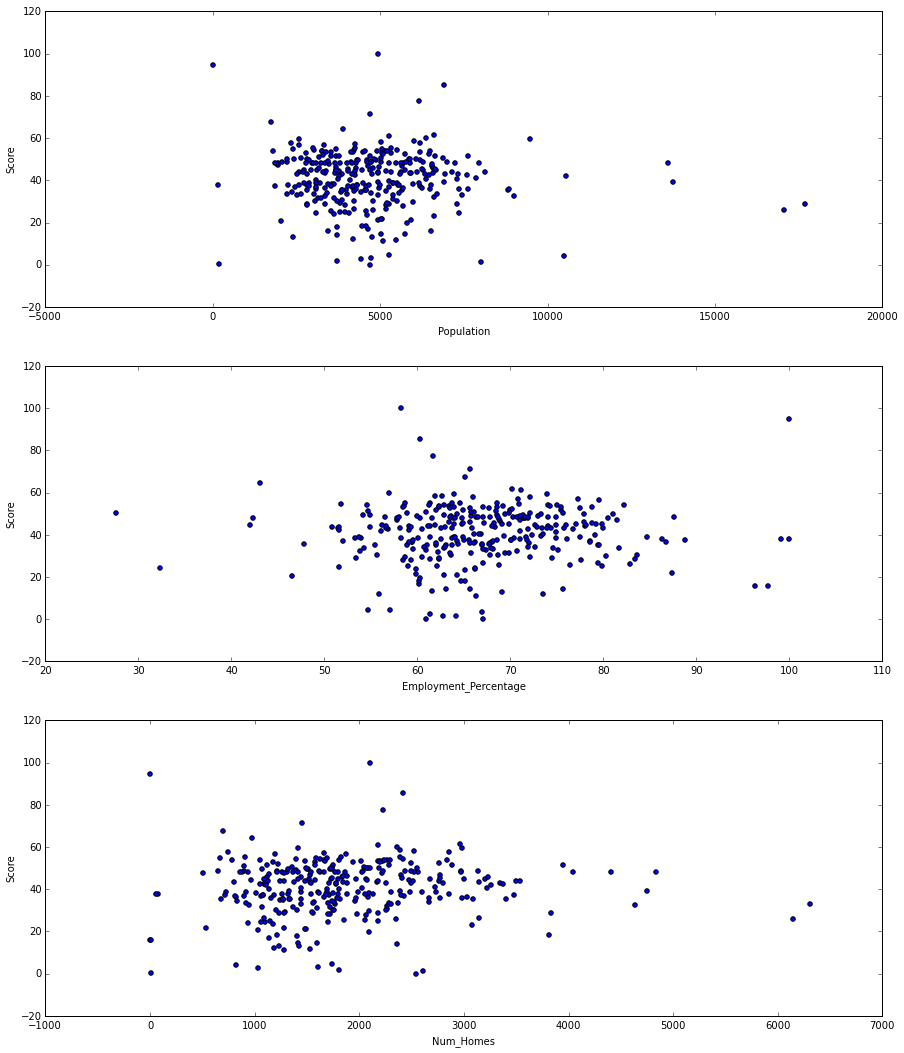

In [13]:
# plot features vs. score
fig, axs = plt.subplots(3,1, sharey=True)
df_new.plot(kind='scatter', x='Population', y='Score', ax=axs[0], figsize=(15, 18))
###axs[0].plot(pop, pop_preds, c='red', linewidth=2)
df_new.plot(kind='scatter', x='Employment_Percentage', y='Score', ax=axs[1])
df_new.plot(kind='scatter', x='Num_Homes', y='Score', ax=axs[2])

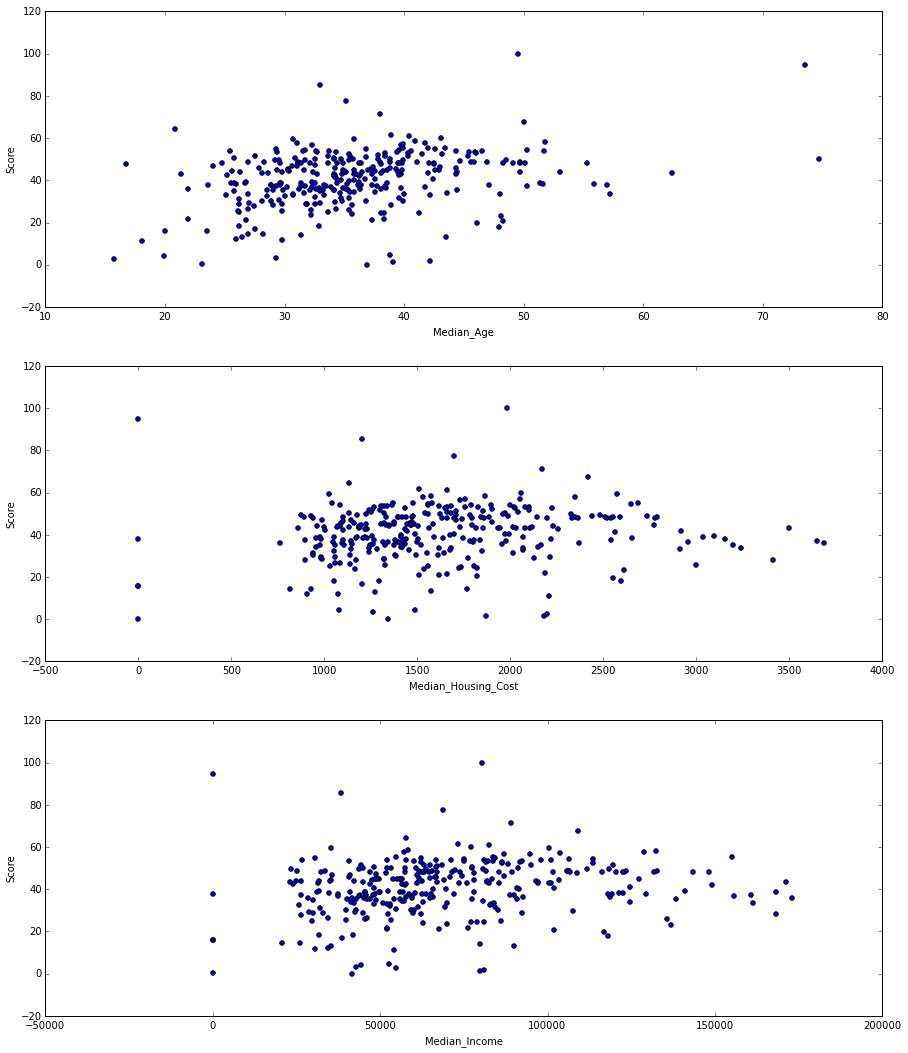

In [14]:
# plot features vs. score
fig, axs = plt.subplots(3, 1, sharey=True)
df_new.plot(kind='scatter', x='Median_Age', y='Score', ax=axs[0], figsize=(15, 18))
df_new.plot(kind='scatter', x='Median_Housing_Cost', y='Score', ax=axs[1])
df_new.plot(kind='scatter', x='Median_Income', y='Score', ax=axs[2])

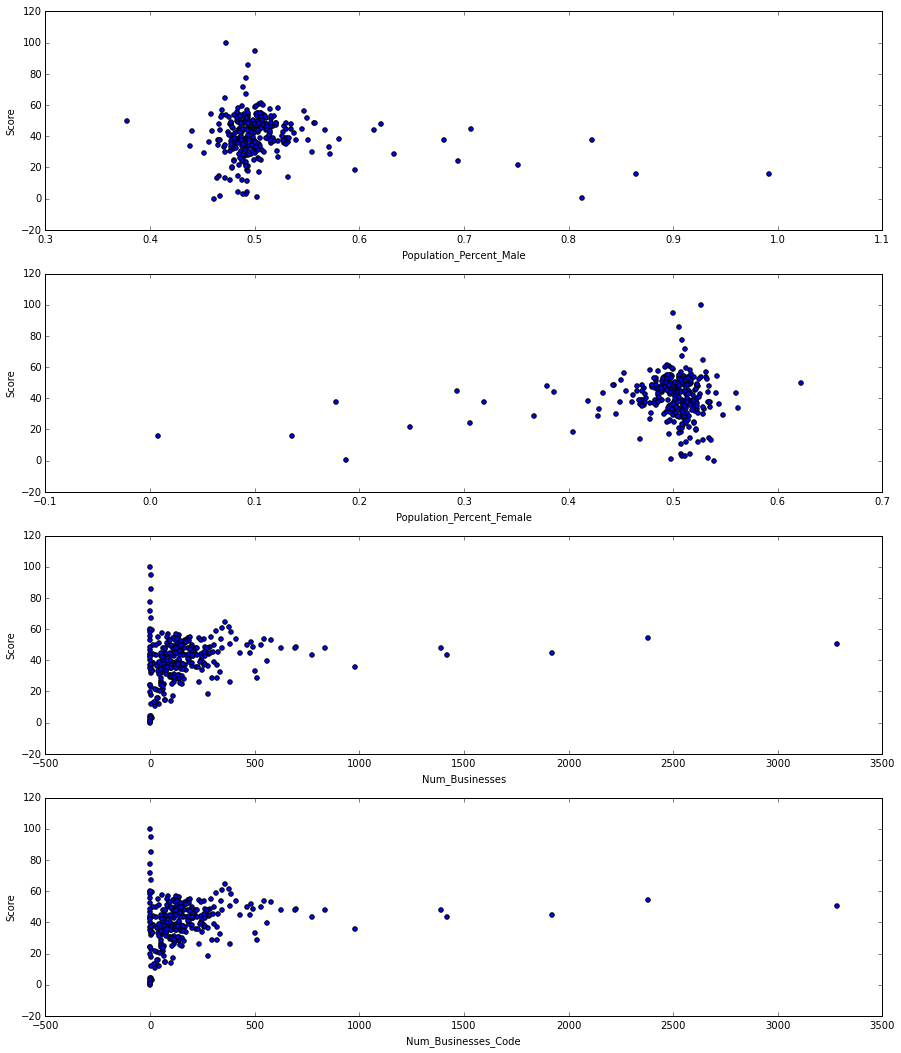

In [15]:
# plot features vs. score
fig, axs = plt.subplots(4, 1, sharey=True)
df_new.plot(kind='scatter', x='Population_Percent_Male', y='Score', ax=axs[0], figsize=(15, 18))
df_new.plot(kind='scatter', x='Population_Percent_Female', y='Score', ax=axs[1])
df_new.plot(kind='scatter', x='Num_Businesses', y='Score', ax=axs[2])
df_new.plot(kind='scatter', x='Num_Businesses_Code', y='Score', ax=axs[3])

In [16]:
# print a summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     4.057
Date:                Fri, 16 Sep 2016   Prob (F-statistic):           7.94e-08
Time:                        11:17:02   Log-Likelihood:                -1227.6
No. Observations:                 314   AIC:                             2495.
Df Residuals:                     294   BIC:                             2570.
Df Model:                          19                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      6.9162     11.716      0.590      0.555       -16.142    29.975
Population                    -0.0005      0.001     -0.603      0.547        -0.002     0.001
Population_Percent_Male      -10.6637     10.482     -1.017      0.310       -31.294     9.966
Population_Percent_Female     17.5800     11.589      1.517      0.130        -5.229    40.389
Median_Age                    -0.8706      0.719     -1.210      0.227        -2.287     0.545
Median_Age_Male                0.5153      0.367      1.404      0.161        -0.207     1.237
Median_Age_Female              0.5153      0.367      1.404      0.161        -0.207     1.237
Percent_Minor              -1360.7467   1567.265     -0.868      0.386     -4445.228  1723.735
Percent_Adult              -1352.3877   1566.747     -0.863      0.389     -4435.849  1731.074
Num_Homes                      0.0009      0.002      0.457      0.648        -0.003     0.005
Homes_Percent_Mortgage        13.7795     15.664      0.880      0.380       -17.048    44.607
Homes_Percent_Clear           13.8735     15.667      0.886      0.377       -16.960    44.707
Homes_Percent_Rent            13.6253     15.666      0.870      0.385       -17.207    44.457
Employment_Percentage          0.1525      0.094      1.615      0.107        -0.033     0.338
Median_Income              -1.016e-06   9.47e-05     -0.011      0.991        -0.000     0.000
Median_Income_Owner         2.583e-07   5.09e-05      0.005      0.996     -9.98e-05     0.000
Median_Income_Renter        -5.94e-06   5.18e-05     -0.115      0.909        -0.000  9.59e-05
Median_Housing_Cost           -0.0029      0.005     -0.588      0.557        -0.012     0.007
Median_Housing_Cost_Owner     -0.0006      0.003     -0.231      0.817        -0.006     0.004
Median_Housing_Cost_Renter     0.0024      0.004      0.598      0.551        -0.006     0.010
Parking_Meter_Amount       -1.502e-08   5.98e-08     -0.251      0.802     -1.33e-07  1.03e-07
Num_Businesses                 0.0040      0.001      3.024      0.003         0.001     0.007
Num_Businesses_Code            0.0040      0.001      3.024      0.003         0.001     0.007
==============================================================================
Omnibus:                       27.519   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.898
Skew:                           0.084   Prob(JB):                     4.13e-26
Kurtosis:                       5.984   Cond. No.                          nan
==============================================================================

Warnings:
[1] The smallest eigenvalue is -2.01e-06. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

40.6531846473
41.1534784559
6.180122418


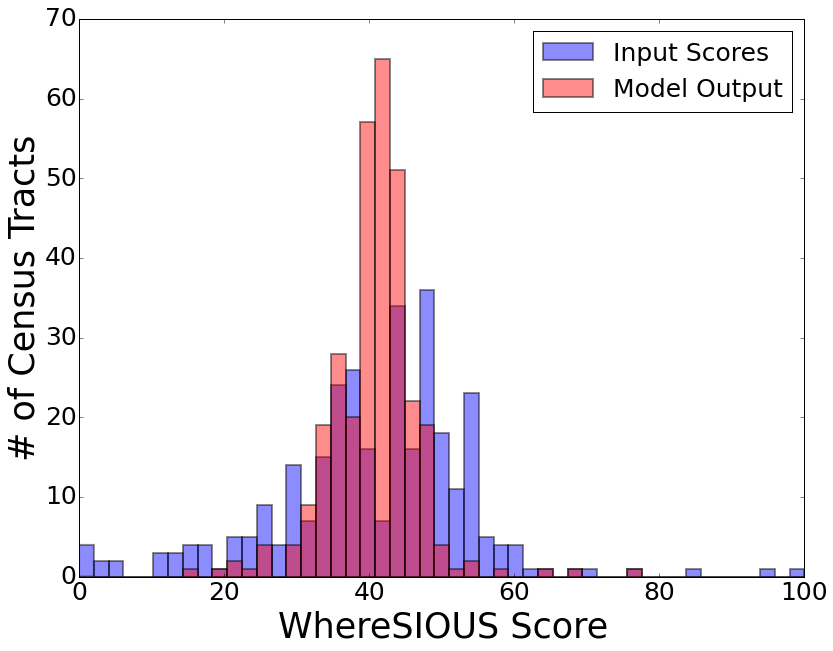

In [23]:
# use coefficients to calculate score for each census tract
scores = lm.predict(df_new)
# make histogram of scores
plt.figure(figsize=(13, 10))
bin_width = 2
bins = np.linspace(min(labels), max(labels), (max(labels)-min(labels))/bin_width)
plt.hist(labels, bins, linewidth=2, alpha=0.45, label='Input Scores');
plt.hist(scores, bins, linewidth=2, alpha=0.45, label='Model Output', color='red');
plt.xlim([min(labels),max(labels)])
plt.legend(loc=0,fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('WhereSIOUS Score',fontsize=35)
plt.ylabel('# of Census Tracts',fontsize=35)
print np.mean(scores)
print np.median(scores)
print np.std(scores)

## Use statsmodels (w/ only one feature)

In [27]:
# turn one feature and labels into dataframe
df_one = pd.DataFrame({'Score': labels, 'Num_Businesses': features[:,20]})
df_one[:10]

,Num_Businesses,Score
0,133.0,54.2
1,182.0,53.8
2,184.0,54.2
3,493.0,48.6
4,480.0,51.6
5,202.0,44.9
6,251.0,38.8
7,214.0,44.6
8,134.0,36.1
9,235.0,26.4


In [28]:
# fit the data
lm = smf.ols(formula='Score ~ Num_Businesses',data=df_one).fit()
# print the coefficients
lm.params

Intercept         39.258353
Num_Businesses     0.007723
dtype: float64

In [29]:
# use the fit to calculate line of best fit
pop = pd.DataFrame({'Num_Businesses': [df_one['Num_Businesses'].min(), df_one['Num_Businesses'].max()]})
pop_preds = lm.predict(pop)
print pop_preds

[ 39.26607617  64.59785198]


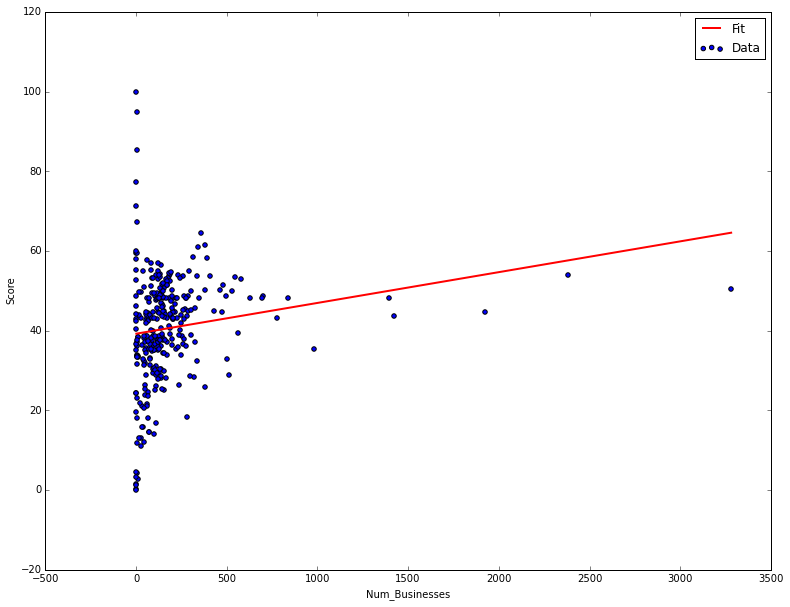

In [30]:
# plot one feature vs. score
df_one.plot(kind='scatter', x='Num_Businesses', y='Score', figsize=(13, 10), label='Data')
plt.plot(pop, pop_preds, c='red', linewidth=2, label='Fit')
plt.legend()

In [31]:
# print a summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     9.069
Date:                Fri, 16 Sep 2016   Prob (F-statistic):            0.00281
Time:                        11:22:55   Log-Likelihood:                -1259.7
No. Observations:                 314   AIC:                             2523.
Df Residuals:                     312   BIC:                             2531.
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         39.2584      0.887     44.247      0.000        37.513    41.004
Num_Businesses     0.0077      0.003      3.011      0.003         0.003     0.013
==============================================================================
Omnibus:                       24.718   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.247
Skew:                           0.048   Prob(JB):                     2.08e-21
Kurtosis:                       5.696   Cond. No.                         406.
==============================================================================
"""

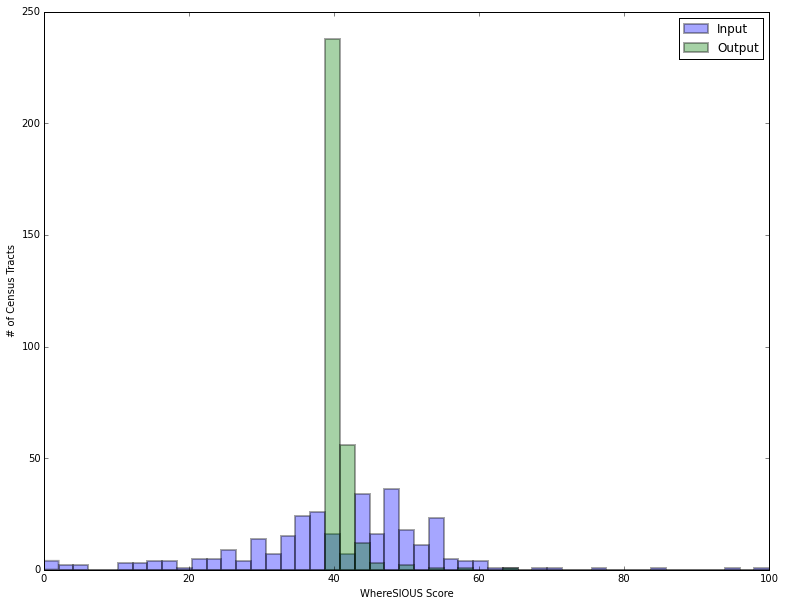

In [32]:
# use coefficients to calculate score for each census tract
scores = lm.predict(df_one)
# make histogram of scores
plt.figure(figsize=(13, 10))
bin_width = 2
bins = np.linspace(min(labels), max(labels), (max(labels)-min(labels))/bin_width)
plt.hist(labels, bins, linewidth=2, alpha=0.35, label='Input');
plt.hist(scores, bins, linewidth=2, alpha=0.35, label='Output');
plt.xlim([min(labels),max(labels)])
plt.legend(loc=0)
plt.xlabel('WhereSIOUS Score')
plt.ylabel('# of Census Tracts')

## Use statsmodels (w/ only one feature, but take out outliers)

In [33]:
# ignore tracts with <5 businesses
cut = features[:,20]>=5
# ignore tracts with >750 businesses
cut = features[:,20]<=750
# ignore tracts with <5 business and >750 businesses
cut = (features[:,20]>=5) & (features[:,20]<=750)
# turn one feature and labels into dataframe
df_one_cut = pd.DataFrame({'Score': labels[cut], 'Num_Businesses': features[cut,20]})
len(df_one_cut)

271

In [34]:
# fit the data
lm_cut = smf.ols(formula='Score ~ Num_Businesses',data=df_one_cut).fit()
# print the coefficients
lm_cut.params

Intercept         35.948517
Num_Businesses     0.029125
dtype: float64

In [35]:
# use the fit to calculate line of best fit
n_bus = pd.DataFrame({'Num_Businesses': [df_one['Num_Businesses'].min(), df_one['Num_Businesses'].max()]})
n_bus_preds = lm_cut.predict(n_bus)
print n_bus

   Num_Businesses
0             1.0
1          3281.0


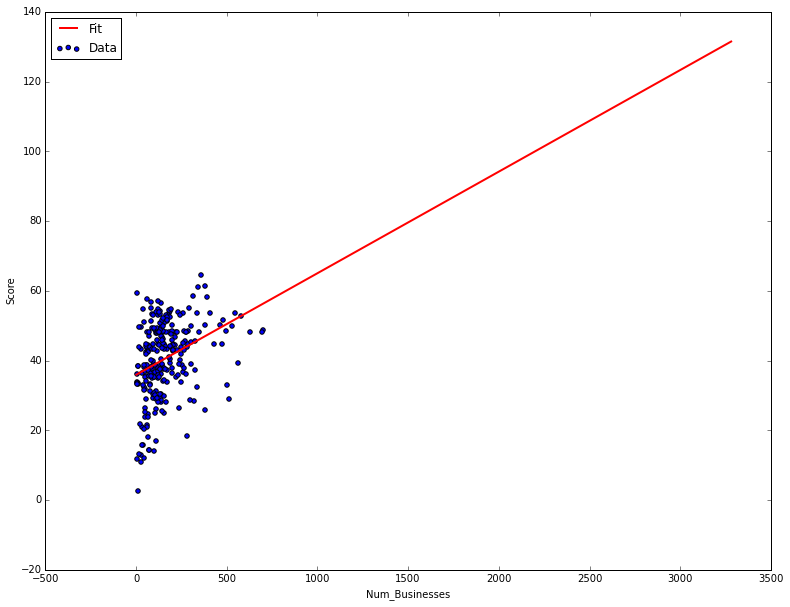

In [36]:
# plot one feature vs. score
df_one_cut.plot(kind='scatter', x='Num_Businesses', y='Score', figsize=(13, 10), label='Data')
plt.plot(n_bus, n_bus_preds, c='red', linewidth=2, label='Fit')
plt.legend(loc=0)

In [37]:
# print a summary of the model
lm_cut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     33.83
Date:                Fri, 16 Sep 2016   Prob (F-statistic):           1.70e-08
Time:                        11:23:04   Log-Likelihood:                -1014.8
No. Observations:                 271   AIC:                             2034.
Df Residuals:                     269   BIC:                             2041.
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         35.9485      1.020     35.246      0.000        33.940    37.957
Num_Businesses     0.0291      0.005      5.817      0.000         0.019     0.039
==============================================================================
Omnibus:                       13.228   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.062
Skew:                          -0.557   Prob(JB):                     0.000884
Kurtosis:                       3.078   Cond. No.                         333.
==============================================================================
"""

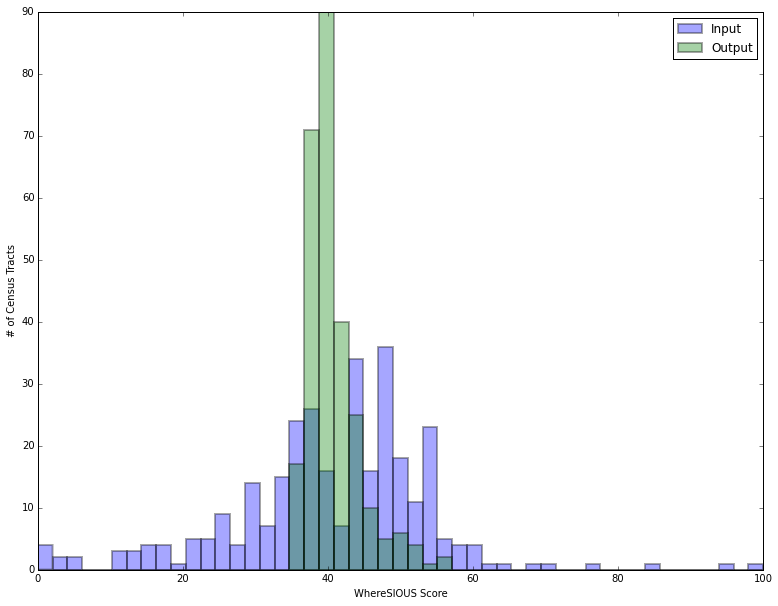

In [38]:
# use coefficients to calculate score for each census tract
scores = lm_cut.predict(df_one_cut)
# make histogram of scores
plt.figure(figsize=(13, 10))
bin_width = 2
bins = np.linspace(min(labels), max(labels), (max(labels)-min(labels))/bin_width)
plt.hist(labels, bins, linewidth=2, alpha=0.35, label='Input');
plt.hist(scores, bins, linewidth=2, alpha=0.35, label='Output');
plt.xlim([min(labels),max(labels)])
plt.legend(loc=0)
plt.xlabel('WhereSIOUS Score')
plt.ylabel('# of Census Tracts')

In [100]:
# read in all census tracts in SD
tracts_all = np.genfromtxt('data_final/tracts_used_all.csv')

# read in all labeled examples
labels_all = np.genfromtxt('data_final/labels_scaled_all.csv')

# read-in all features
if scaled:
    features_all = np.genfromtxt('data_final/features_scaled_all.csv', delimiter=',')
    means_stddevs_all = np.genfromtxt('data_final/means_stddevs_all.csv', delimiter=',')
else:
    features_all = np.genfromtxt('data_final/features_all.csv', delimiter=',')

# define new dataframe
df_tracts_all = pd.DataFrame({'Score': labels_all, 'Num_Businesses': features_all[:,20]})

# recalc scores for all census tracts in SD
scores_all = lm.predict(df_tracts_all)

# make sure all scores are between 1 and 100
scores_all[scores_all<1] = 1
scores_all[scores_all>100] = 100

# write all census tracts and scores to file with other CSVs and flask folder for web
np.savetxt('data_final/tracts_scores'+extra+'.csv', np.stack((tracts_all,scores_all),axis=1), fmt='%.0i %.1f')
np.savetxt('wheresious/static/tracts_scores'+extra+'.csv', np.stack((tracts_all,scores_all),axis=1), fmt='%.0i %.1f')